In [4]:
%%html
<marquee style='width: 80%; color: blue;'><b>Data visualization using Matplotlib by Emad Tolba</b></marquee>

![](logo2.png)

# Introduction to Matplotlib

Matplotlib is a Python visualization library producing publication quality figures in a variety of hardcopy formats and interactive environments. Matplotlib can be used in Python scripts, the Python and IPython shell, web application servers, and various graphical user interface toolkits.

__Documentation__:
* https://matplotlib.org/

### Load Necessary Libraries

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

![Diagram of the components of the matplotlib generated visualization.](mpl_anatomy.png)

There are two big components that you need to take into account:

- The **Figure** is the overall window or page that everything is drawn on. It’s the top-level component of all the ones that you will consider in the following points. You can create multiple independent Figures. A Figure can have several other things in it, such as a suptitle, which is a centered title to the figure. You’ll also find that you can add a legend and color bar, for example, to your Figure.

- To the figure you add **Axes**. The Axes is the area on which the data is plotted with functions such as plot() and scatter() and that can have ticks, labels, etc. associated with it. This explains why Figures can contain multiple Axes.


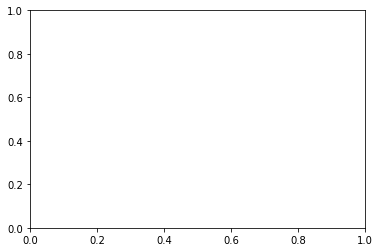

In [8]:

fig, ax = plt.subplots()

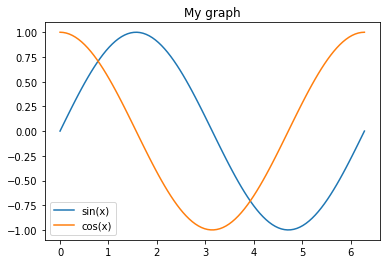

In [131]:
x = np.linspace(0,2*np.pi, 100)
sin_x = np.sin(x)
cos_x = np.cos(x)
plt.plot(x,sin_x,label='sin(x)')
plt.plot(x,cos_x,label='cos(x)')
plt.legend()
plt.title("My graph")
plt.show()


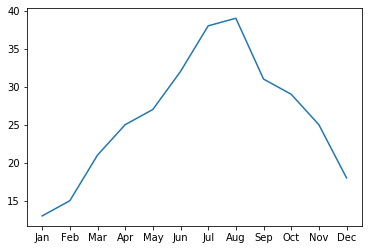

In [20]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] 
avg_cairo_temp=[13,15,21,25,27,32,38,39,31,29,25,18]
avg_alex_temp=[10,13,19,23,26,32,37,38,28,26,21,15]
avg_london_temp=[1,4,10,14,17,20,23,25,20,14,9,2]

fig, ax = plt.subplots()
ax.plot(months,avg_cairo_temp)
plt.show()

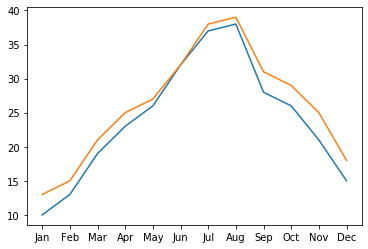

In [17]:
fig, ax = plt.subplots()
ax.plot(months,avg_alex_temp)
ax.plot(months,avg_cairo_temp)
plt.show()

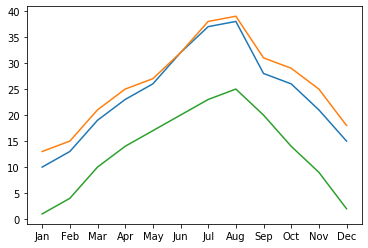

In [21]:
fig, ax = plt.subplots()
ax.plot(months,avg_alex_temp)
ax.plot(months,avg_cairo_temp)
ax.plot(months,avg_london_temp)
plt.show()

#### Customizing the axes labels

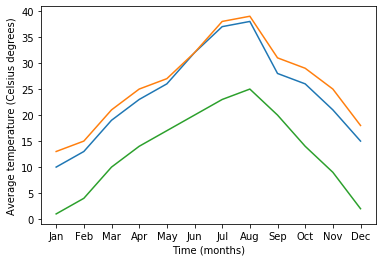

In [22]:
fig, ax = plt.subplots()
ax.plot(months,avg_alex_temp)
ax.plot(months,avg_cairo_temp)
ax.plot(months,avg_london_temp)

ax.set_xlabel("Time (months)")
ax.set_ylabel("Average temperature (Celsius degrees)")

plt.show()

#### Adding a title

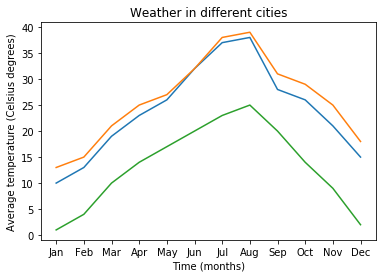

In [23]:
ig, ax = plt.subplots()
ax.plot(months,avg_alex_temp)
ax.plot(months,avg_cairo_temp)
ax.plot(months,avg_london_temp)
ax.set_xlabel("Time (months)")
ax.set_ylabel("Average temperature (Celsius degrees)")

ax.set_title("Weather in different cities")
plt.show()

#### Figure size
#### Choosing markers, Setting the linestyle, and Choosing color

https://matplotlib.org/api/markers_api.html


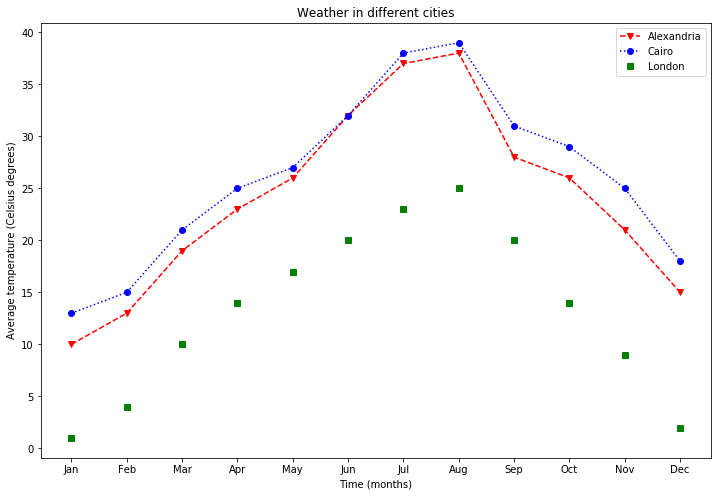

In [35]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(months,avg_alex_temp, marker="v", linestyle="--", color="r", label="Alexandria")
ax.plot(months,avg_cairo_temp, marker="o", linestyle=":", color="b", label="Cairo")
ax.plot(months,avg_london_temp ,marker="s", linestyle="None", color="g", label="London")
ax.set_xlabel("Time (months)")
ax.set_ylabel("Average temperature (Celsius degrees)")
ax.set_title("Weather in different cities")
ax.legend()
plt.show()

#### Small multiples with plt.subplots

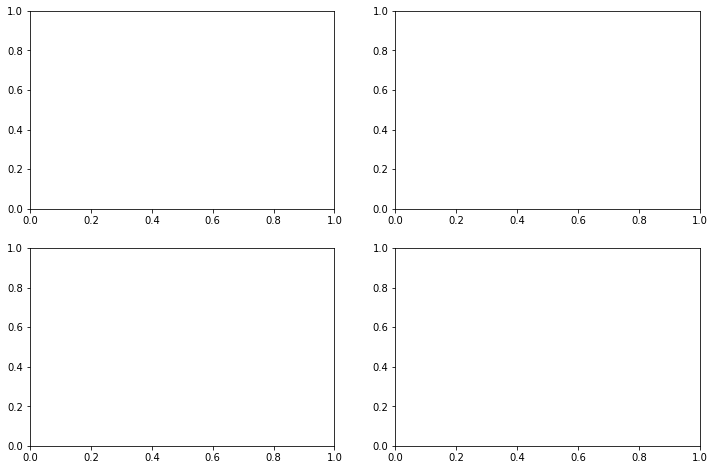

In [44]:
fig, ax = plt.subplots(2, 2,figsize=(12,8))
plt.show()

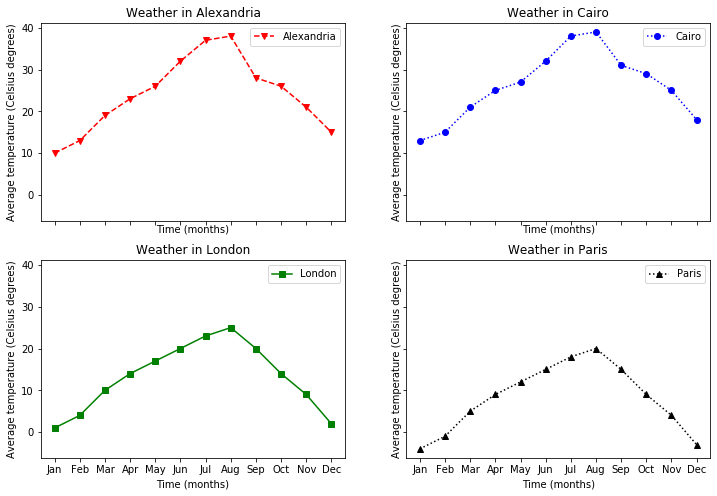

In [57]:
avg_Paris_temp=[x-5 for x in avg_london_temp]
temp=[avg_alex_temp,avg_cairo_temp,avg_london_temp,avg_Paris_temp]
cities=["Alexandria","Cairo","London","Paris"]
linestyle=["--",":",'solid','dotted']
colors=["r","b","g","k"]
markers=["v","o","s","^"]
fig, ax = plt.subplots(2, 2,figsize=(12,8),sharex=True,sharey=True)
index=0
for i in range(2):
    for j in range(2):
        ax[i,j].plot(months,temp[index], marker=markers[index], linestyle=linestyle[index], color=colors[index],
                     label=cities[index])
        ax[i,j].set_xlabel("Time (months)")
        ax[i,j].set_ylabel("Average temperature (Celsius degrees)")
        ax[i,j].set_title("Weather in " + cities[index])
        ax[i,j].legend()
        index+=1
#ax[0,0].plot(months,avg_alex_temp, marker="v", linestyle="--", color="r", label="Alexandria")
plt.show()

## A basic bar plot



In [69]:
# read data
sales = pd.read_csv('vgsales.csv')
sales.shape
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Prepare the data - Sales by Year

In [70]:
yearly_sales = pd.DataFrame({'total_global_sales' : sales.groupby( [ "Year"] )['Global_Sales'].
                             sum()}).reset_index().set_index(['Year'])
yearly_sales.head()

,total_global_sales
Year,
1980.0,11.38
1981.0,35.77
1982.0,28.86
1983.0,16.79
1984.0,50.36


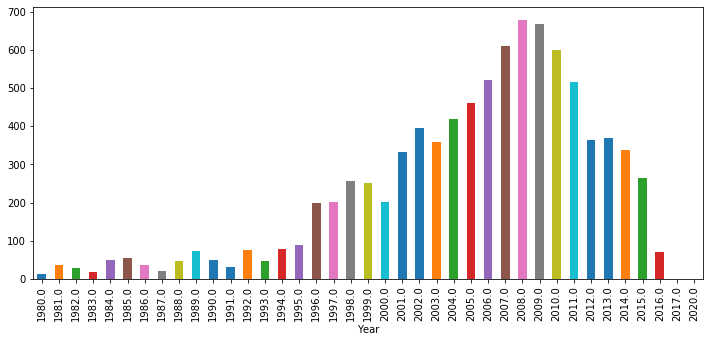

In [74]:
plt.figure(figsize=(12,5))
chart = yearly_sales.total_global_sales.plot(kind='bar')

## Let's Customize our bar plot

### Change the color of the bars

Text(0, 0.5, 'Global Sales')

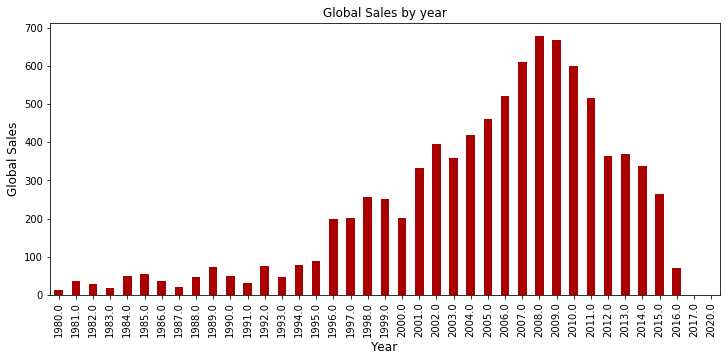

In [75]:
plt.figure(figsize=(12,5))
chart = yearly_sales.total_global_sales.plot(kind='bar',facecolor='#AA0000',
                                             title='Global Sales by year');
chart.set_xlabel("Year", fontsize=12)
chart.set_ylabel("Global Sales", fontsize=12)

## Making a stacked bar plot

### Data - Regional sales, grouped by Genre 

In [72]:
genre = sales[[ "Genre", 'NA_Sales','EU_Sales','JP_Sales']].groupby(['Genre'], as_index=False).sum()
genre

,Genre,NA_Sales,EU_Sales,JP_Sales
0,Action,877.83,525.00,159.95
1,Adventure,105.80,64.13,52.07
2,Fighting,223.59,101.32,87.35
3,Misc,410.24,215.98,107.76
4,Platform,447.05,201.63,130.77
5,Puzzle,123.78,50.78,57.31
6,Racing,359.42,238.39,56.69
7,Role-Playing,327.28,188.06,352.31
8,Shooter,582.60,313.27,38.28
9,Simulation,183.31,113.38,63.70


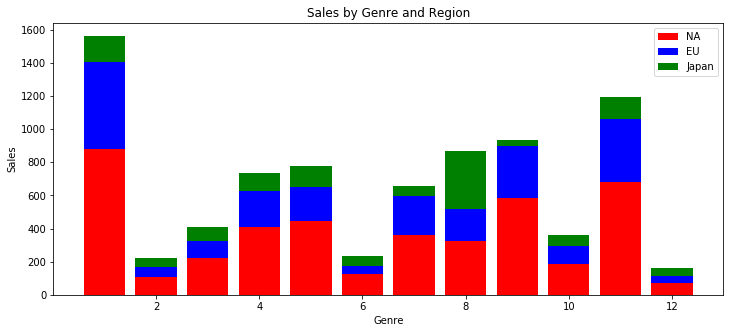

In [100]:
f, ax = plt.subplots(1, figsize=(12,5))
bar_l = [i+1 for i in range(len(genre['NA_Sales']))]
ax.bar(bar_l, genre['NA_Sales'], label='NA', color='red')
ax.bar(bar_l, genre['EU_Sales'], bottom=genre['NA_Sales'], label='EU',color='blue')
ax.bar(bar_l, genre['JP_Sales'], bottom=[i+j for i,j in zip(genre['NA_Sales'],genre['EU_Sales'])], label='Japan',color='green')
ax.set_title("Sales by Genre and Region")
ax.set_xlabel("Genre");
ax.set_ylabel("Sales");
plt.legend(loc='upper right');
f.savefig("stacked bar chart.jpg", dpi=300)

## histograms

([array([  7.,  29.,  85., 164., 258., 243., 148.,  54.,  10.,   2.]),
  array([  8.,  23.,  87., 180., 250., 236., 141.,  60.,  13.,   2.])],
 array([-0.96950571, -0.76811549, -0.56672527, -0.36533504, -0.16394482,
         0.0374454 ,  0.23883562,  0.44022584,  0.64161606,  0.84300628,
         1.04439651]),
 <a list of 2 Lists of Patches objects>)

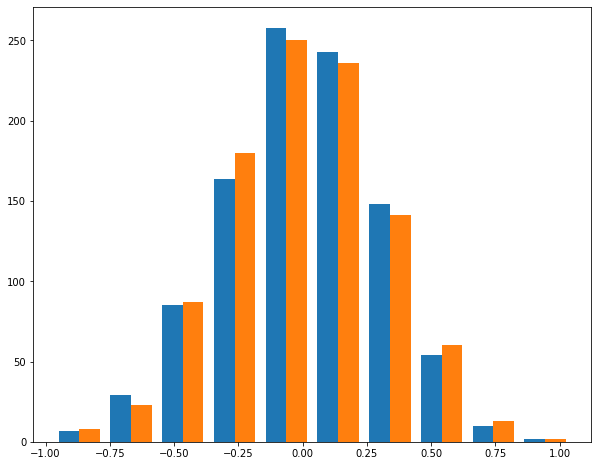

In [96]:
plt.figure(figsize=[10,8])
x = 0.3*np.random.randn(1000)
y = 0.3*np.random.randn(1000)
plt.hist([x, y])

In [112]:
df=pd.read_csv("wineQualityWhites.csv")
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


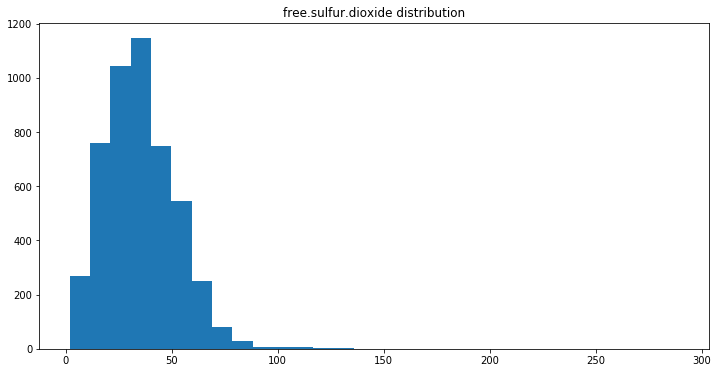

In [115]:
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(df['free.sulfur.dioxide'],bins=30)
ax.set_title('free.sulfur.dioxide distribution')
plt.show()

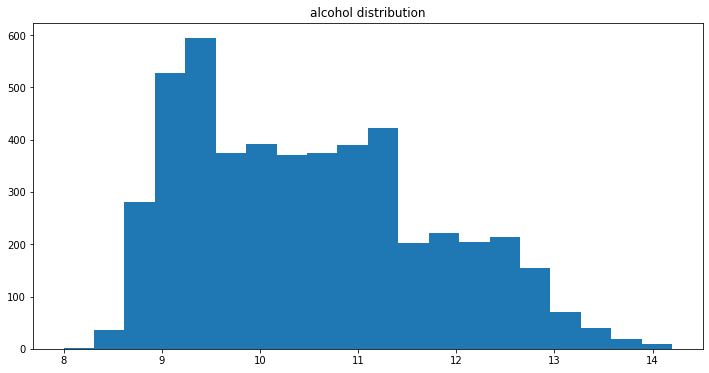

In [124]:
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(df['alcohol'],bins=20)
ax.set_title('alcohol distribution')
plt.show()

### Drawing box plots

<function matplotlib.pyplot.show(*args, **kw)>

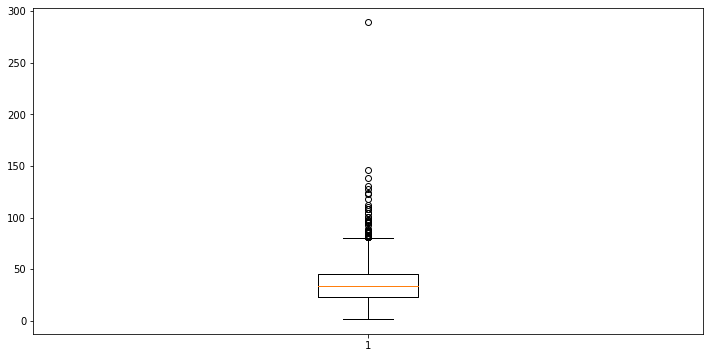

In [116]:
plt.figure(1, figsize=(12, 6))
plt.boxplot(df['free.sulfur.dioxide'])
plt.show

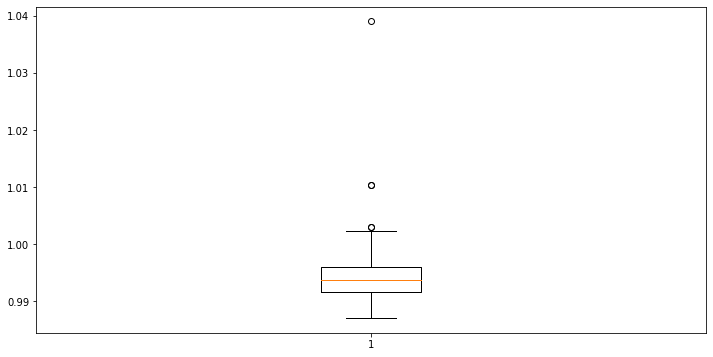

In [133]:

plt.figure(1, figsize=(12, 6))
plt.boxplot(df.density)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

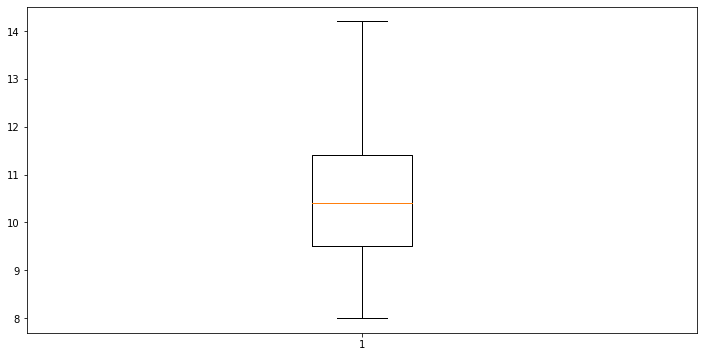

In [122]:
plt.figure(1, figsize=(12, 6))
plt.boxplot( df['alcohol'])
plt.show

## Scatter plots

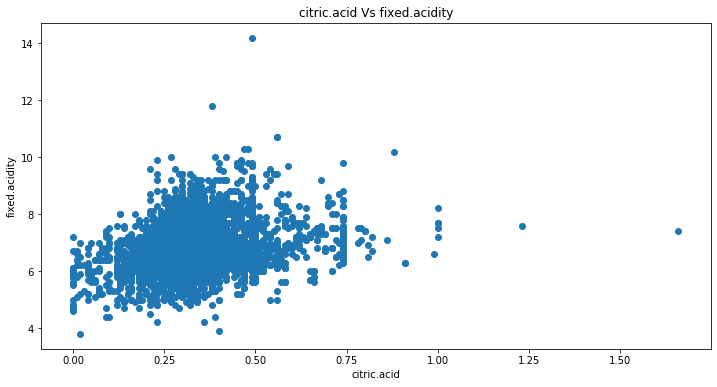

In [125]:
plt.figure(figsize=(12,6))
plt.scatter(df['citric.acid'], df['fixed.acidity'])
plt.title('citric.acid Vs fixed.acidity')
plt.xlabel('citric.acid')
plt.ylabel('fixed.acidity')
plt.show()

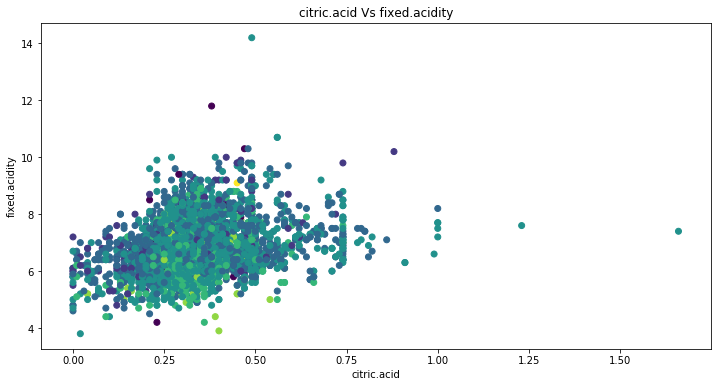

In [126]:
plt.figure(figsize=(12,6))
plt.scatter(df['citric.acid'], df['fixed.acidity'],c=df.quality)
plt.title('citric.acid Vs fixed.acidity')
plt.xlabel('citric.acid')
plt.ylabel('fixed.acidity')
plt.show()

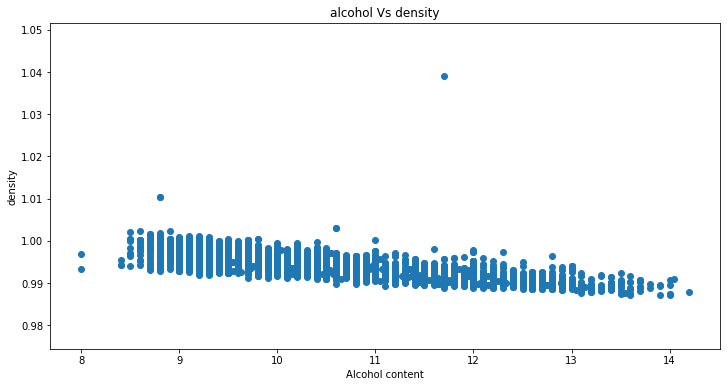

In [111]:
plt.figure(figsize=(12,6))
plt.scatter(df.alcohol, df.density)
plt.title('alcohol Vs density')
plt.xlabel('Alcohol content')
plt.ylabel('density')
plt.show()

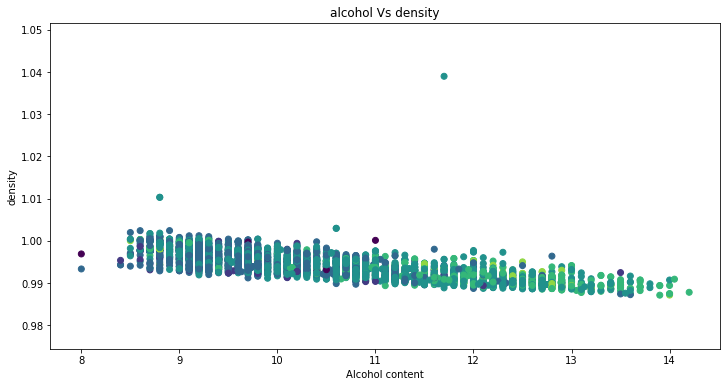

In [107]:
plt.figure(figsize=(12,6))
plt.scatter(df.alcohol, df.density,c=df.quality)
plt.title('alcohol Vs density')
plt.xlabel('Alcohol content')
plt.ylabel('density')
plt.show()

## Pie charts

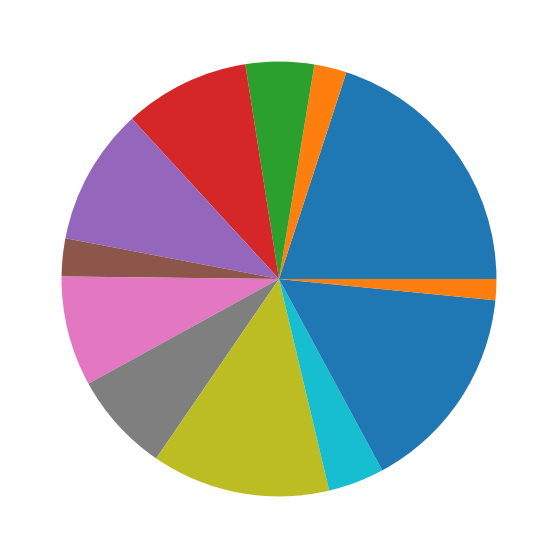

In [88]:
explode_list = [0.1, 0, 0, 0, 0.1, 0.1,0,0,0,0,0,0] # ratio for each continent with which to offset each wedge.
plt.figure(figsize=(10, 10))
plt.pie(genre['NA_Sales'])
plt.show()

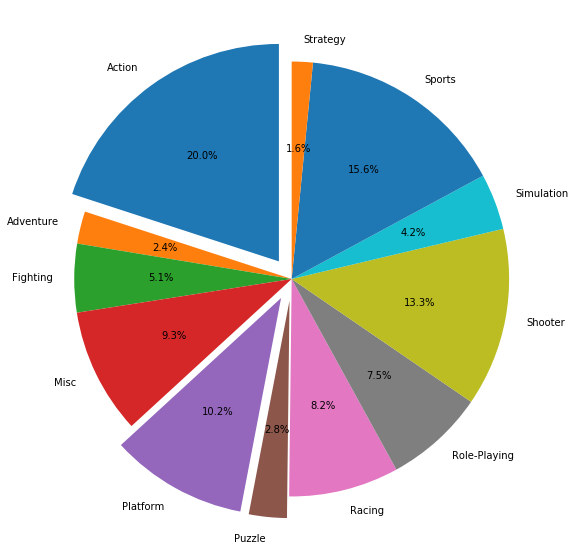

In [90]:
plt.figure(figsize=(10, 10))
plt.pie(genre['NA_Sales'],labels=genre['Genre'],startangle=90, autopct='%1.1f%%',explode=explode_list)
plt.show()

## Saving the Figure to file

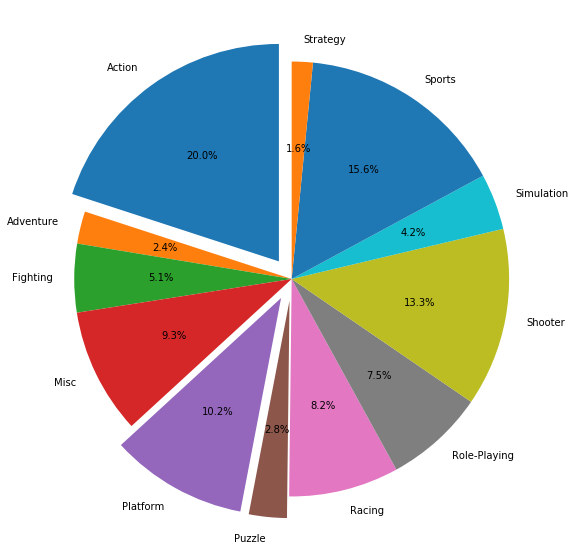

In [99]:
fig=plt.figure(figsize=(10, 10))
plt.pie(genre['NA_Sales'],labels=genre['Genre'],startangle=90, autopct='%1.1f%%',explode=explode_list)
fig.savefig("Pie chart.png", dpi=300)